<h4><center><font color="1F4690">PJJ Data Analytic Specialist <br> <br> Senin, 15 Agustus 2022</font></center></h4>
<div class="alert alert-info"><h1 align="center"><font color="1F4690">Problem - Pagi Hari</font></h4></div> 

In [18]:
import pandas as pd
df_titanic = pd.read_csv('https://raw.githubusercontent.com/CRMDSDIP/PJJDAS_IV/main/Data_Preparation/day2/dataset/titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## PERTANYAAN

1. Buatlah summary setiap kolom (buat informasi terkait ada/tidak data yang hilang dari setiap varibel). Bisa menggunakan .info() atau menggunakan library missingno .

2. Deskripsikan berdasarkan perkiraan anda apa jenis missing data yang terjadi pada kolom :
    * Age 
    * Cabin 
    * Embarked 

3. Pilih 2 dari 3 metode untuk identifikasi outlier untuk mengidentifikasi outlier pada variabel **Age**. Apakah outlier tersebut perlu diganti ?

4. Buatlah analisis anda terkait treatment yang paling cocok terhadap data tersebut. Analisis anda mencakup 
    * mengapa anda memilih metode tersebut, 
    * distribusi data sebelum dan setelah penerapan treatment.
 
No 3, 4 adalah pertanyaan terbuka, hal yang terpenting adalah kelogisan dari argumen anda.

## JAWABAN



### 1. Buatlah summary setiap kolom (buat informasi terkait ada/tidak data yang hilang dari setiap varibel). Bisa menggunakan .info() atau menggunakan library missingno

<AxesSubplot:>

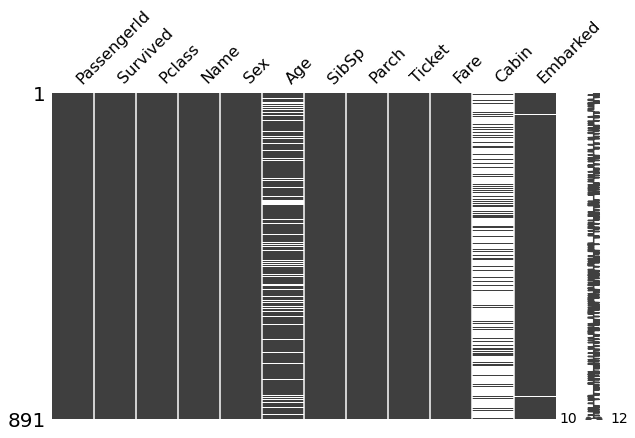

In [5]:
# menggunakan library missingno
import missingno as msno
msno.matrix(df_titanic, figsize=(10, 6))

Terdapat missing value pada kolom Age, Cabin, dan Embarked

In [19]:
# menggunakan df.info
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Kesimpulannya sama, kolom Age, Cabin dan Embarked ada missing value

In [8]:
# menghitung jumlah missing value pada setiap kolom
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2. Deskripsikan berdasarkan perkiraan anda apa jenis missing data yang terjadi pada kolom :
* Age
* Cabin
* Embarked



<AxesSubplot:>

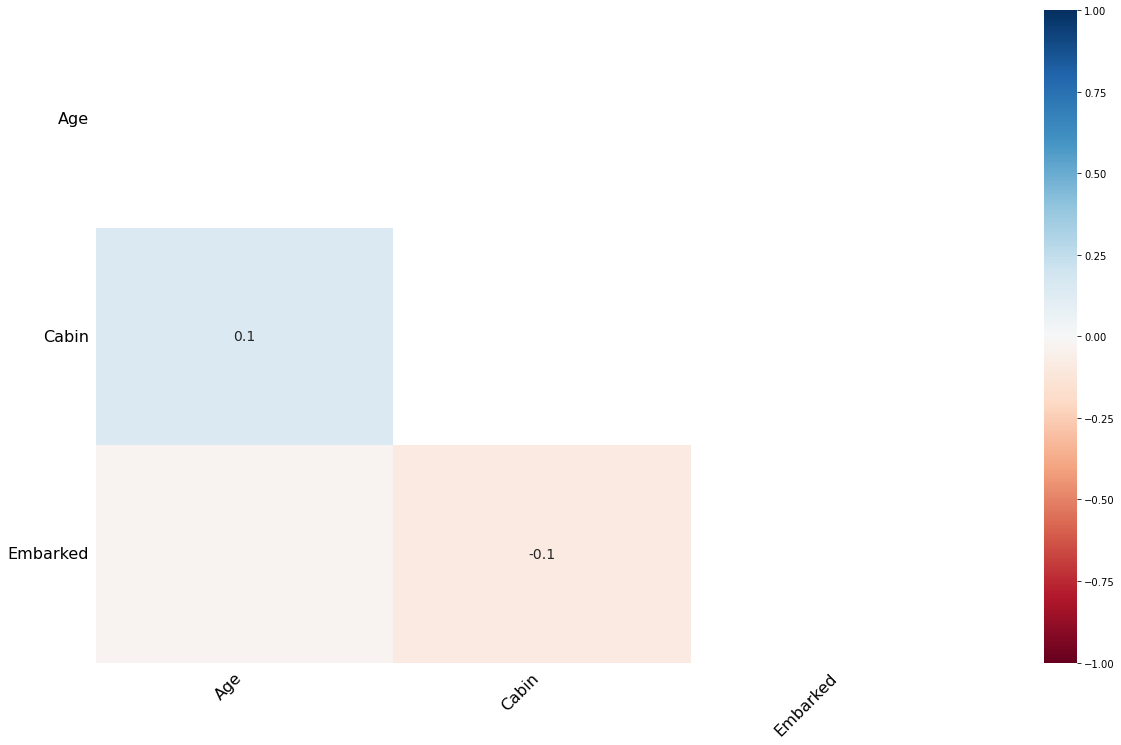

In [29]:
msno.heatmap(df_titanic)


Dari heatmap di atas, dapat kita analisis bahwa missing value yang terjadi pada suatu kolom tidak memiliki hubungan dengan kolom lainnya

In [46]:
# missing value pada kolom Age
missing_val = df_titanic[df_titanic.Age.isnull()]
missing_val.groupby(by = ['Sex']).agg(['count'])


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,count,count,count,count,count,count,count,count,count,count,count
Sex,,,,,,,,,,,
female,53,53,53,53,0,53,53,53,53,7,53
male,124,124,124,124,0,124,124,124,124,12,124


missing value pada kolom Age sebagian besar terjadi untuk passenger laki-laki

In [48]:
# missing value pada kolom Cabin
missing_val = df_titanic[df_titanic.Cabin.isnull()]
missing_val.groupby(by = ['Pclass']).agg(['count'])

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,count,count,count,count,count,count,count,count,count,count,count
Pclass,,,,,,,,,,,
1,40,40,40,40,26,40,40,40,40,0,40
2,168,168,168,168,158,168,168,168,168,0,168
3,479,479,479,479,345,479,479,479,479,0,479


In [51]:
# missing value pada kolom Embarked
missing_val = df_titanic[df_titanic.Embarked.isnull()]
missing_val.groupby(by = ['Ticket','PClass']).agg(['count'])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,count,count,count,count,count,count,count,count,count,count,count,count
PClass,1,1,1,1,1,1,1,1,1,1,1,0
Ticket,1,1,1,1,1,1,1,1,1,1,1,0


missing value untuk kolom embarked seluruhnya berasal dari passenger class 1 dengan nomor tiket 113572

Kami menyimpulkan bahwa missing values yang terjadi pada dataset ini 

### 3. Pilih 2 dari 3 metode untuk identifikasi outlier untuk mengidentifikasi outlier pada variabel **Age**. Apakah outlier tersebut perlu diganti ?